In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime

In [6]:
five_locations=["acc","als","AMD","amsalk","ap10"]

In [108]:
all_locations=["acc",
"als",
"AMD",
"AMS",
"amsalk",
"ap10",
"ap3",
"ASH",
"ash02",
"ash02alk",
"ash02ell",
"ASH02na10",
"ASH02na11",
"ash02na14",
"ash02na15",
"ash02na18",
"ASH02NA9",
"boq",
"BRU03EU9",
"cbr01",
"CBRAC2",
"CGK",
"cgk01",
"cgk02id2",
"csyd01",
"EU7AMS",
"fra",
"FRA02EU10",
"FRA03EU11",
"gci",
"GRU01",
"HKG",
"HKG01AP5",
"HLZ",
"HLZ01AU11",
"hnd",
"HND01AP4",
"IL1MED1",
"IL2MED1",
"jer",
"JNB",
"JNB01AF3",
"JNB01AF5",
"jnb02",
"JNB02AF4",
"JNB03AF4",
"lhr03",
"LHR03EU8",
"mel",
"melau10",
"MELau10",
"mrcy",
"NA2",
"NA4",
"sin01ap8",
"sin01ap9",
"sin02ap6",
"sin03ap7",
"SNU",
"SNUna12",
"SNUna13",
"SNUna16",
"snuna17",
"SYD",
"SYDau9",
"WLG01AU12",
"yyz01",
"YYZ01CA2"]

In [113]:
len(all_locations)

68

In [84]:
fig1, ax = plt.subplots(1,5)
fig2, bx = plt.subplots(1,5)

In [106]:
# all economy graphs for Jun 2016
def get_RAMCPUUsage_Graph_Month(month):
    if month == "jun":
        month_str = '6\/[0-9][0-9]\/2016'
    elif month == "jul":
        month_str = '7\/[0-9][0-9]\/2016'
    elif month == "aug":
        month_str = '8\/[0-9][0-9]\/2016'
    elif month == "sep":
        month_str = '9\/[0-9][0-9]\/2016'
    elif month == "nov":
        month_str = '2016-11'
    else:
        return "Month passed is not valid"
    start=datetime.datetime.now()
    m=0
    n=0
    ncols=5
    nrows=math.ceil(len(all_locations)/ncols)
    fig1, ax = plt.subplots(nrows,ncols)
    fig2, bx = plt.subplots(nrows,ncols)
    fig1.set_figheight(10)
    fig1.set_figwidth(10)
    fig1.suptitle("RAM Usage for " + month + " 2016")
    fig1.subplots_adjust(hspace=.5)    
    fig2.set_figheight(10)
    fig2.set_figwidth(10)
    fig2.suptitle("CPU Usage for " + month + " 2016")
    fig2.subplots_adjust(hspace=.5)    
    for locations in five_locations:
        esx_acc_all = pd.read_csv('results/esx_loc/new/'+locations+"N", header=None)
        esx_acc_all['CPU_usage'] = esx_acc_all[2] * esx_acc_all[4] / 100
        esx_acc_all['RAM Used'] = esx_acc_all[3] * esx_acc_all[5] / 100
        esx_acc_all.columns = ['Esx_clust',
        'Esx_host',
        'esx_totmhz',
        'esx_insram',
        'esx_cpu',
        'esx_ram',
        'esx_loc',
        'esx_time',
        'CPU_usage',
        'RAM Used'
        ]
        esx_acc_all.drop(esx_acc_all.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)
        #esx_acc_all['esx_time'] = esx_acc_all['esx_time'].apply(lambda x: str(x).replace(str(x)[-8:-3],'00:00'))
        esx_jun2016_all = esx_acc_all[esx_acc_all.esx_time.str.contains(month_str) > 0]
        esx_jun2016_all['Date'] = pd.to_datetime(esx_jun2016_all['esx_time'])
        esx_jun2016_all['Date'] = esx_jun2016_all['Date'].dt.date
        esx_jun2016_GB_graph_tier = esx_jun2016_all.groupby(['Esx_clust', 'Esx_host', 'Date'])
        new_esx = esx_jun2016_GB_graph_tier.agg({'CPU_usage':'max', 'RAM Used':'max'})
        new_esx.reset_index(level=2, inplace=True)
        new_esx.reset_index(level=1, inplace=True)
        new_esx.drop(new_esx.columns[[0]], axis=1, inplace=True)
        esx_Graph = new_esx.groupby(['Date']).sum()
        temp=esx_Graph.reset_index(level=['Date'])
        temp2=pd.DataFrame()
        temp2['Date']=temp['Date']
        temp2['RAM_Used']=temp['RAM Used']
        temp2['CPU_Usage']=temp['CPU_usage']
        temp2 = temp2.set_index('Date')
        ts=(temp2['RAM_Used'])
        print(m,n)
        ax[m,n].plot(ts)
        ax[m,n].set_title(locations)
        ax[m,n].axes.get_xaxis().set_visible(False)
        ax[m,n].axes.get_yaxis().set_visible(False)
        ts=(temp2['CPU_Usage'])
        bx[m,n].plot(ts)
        bx[m,n].set_title(locations)
        bx[m,n].axes.get_xaxis().set_visible(False)
        bx[m,n].axes.get_yaxis().set_visible(False)
        n+=1
    fig1.savefig('RAM.png', bbox_inches='tight')
    fig2.savefig('CPU.png', bbox_inches='tight')
    plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0 0
0 1
0 2
0 3
0 4


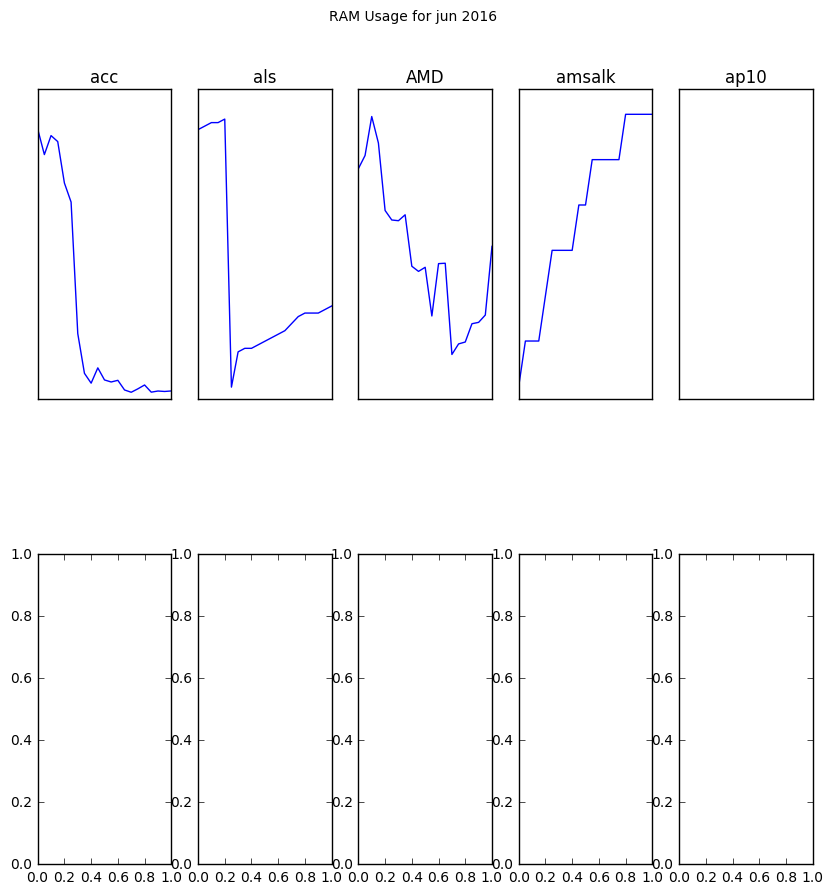

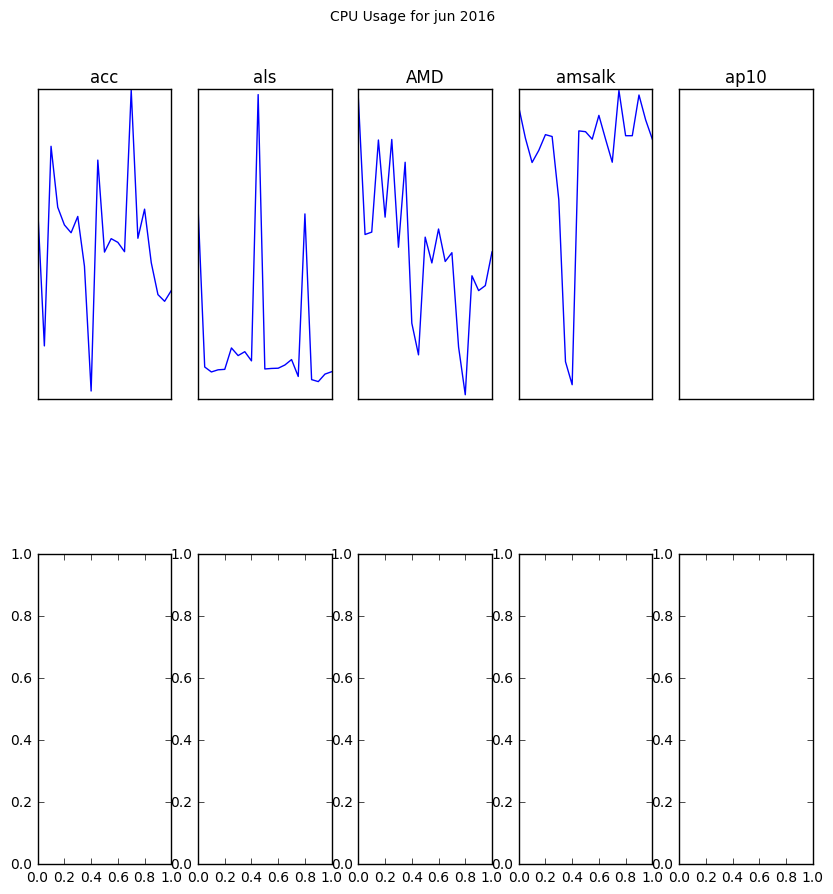

In [107]:

get_RAMCPUUsage_Graph_Month("jun")

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


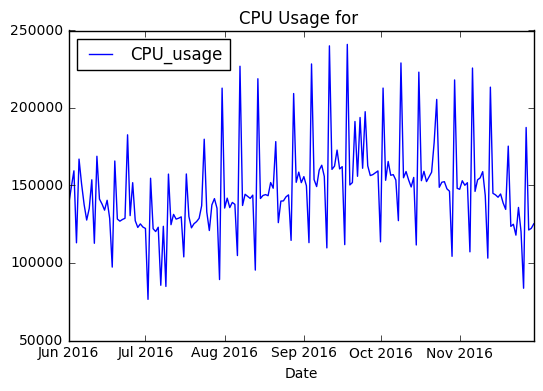

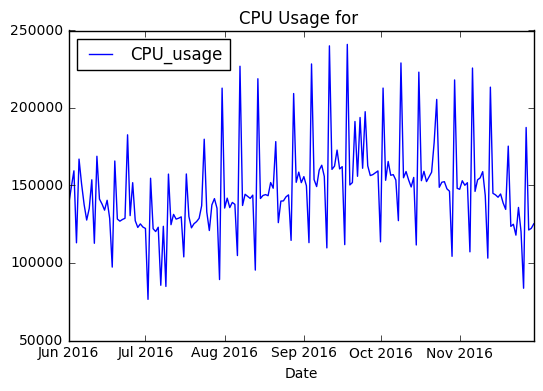

In [3]:
esx_acc_all = pd.read_csv('results/esx_loc/new/accN', header=None)
esx_acc_all['CPU_usage'] = esx_acc_all[2] * esx_acc_all[4] / 100
esx_acc_all['RAM Used'] = esx_acc_all[3] * esx_acc_all[5] / 100
esx_acc_all.columns = ['Esx_clust',
        'Esx_host',
        'esx_totmhz',
        'esx_insram',
        'esx_cpu',
        'esx_ram',
        'esx_loc',
        'esx_time',
        'CPU_usage',
        'RAM Used'
        ]
esx_acc_all.drop(esx_acc_all.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)
esx_jun2016_all = esx_acc_all[esx_acc_all.esx_time.str.contains('(6|7|8|9|10|11)\/[0-9]{1,2}\/2016') > 0]
esx_jun2016_all['esx_time'] = esx_jun2016_all['esx_time'].apply(lambda x: str(x).replace(str(x)[-8:-3],'00:00'))
aa = esx_jun2016_all.groupby(['Esx_clust', 'Esx_host', 'esx_time'])
new = aa.agg({'CPU_usage':'max', 'RAM Used': 'max'})
new = new.reset_index(level=['Esx_clust', 'Esx_host', 'esx_time'])
new['Date'] = pd.to_datetime(new['esx_time'])
new2 = new.groupby(['Date'])
#may be remove esx_host from grouby here?
new2 = new2.agg({'CPU_usage':'sum', 'RAM Used': 'sum'})
new2 = new2.reset_index(level=['Date'])
new2['Date'] = new2['Date'].dt.date
new3 = new2.groupby(['Date'])
new3 = new3.agg({'CPU_usage':'max', 'RAM Used': 'max'})
new4=new3.reset_index(level=['Date'])
fig=plt.figure()
new4.plot(x='Date', y='CPU_usage', title="CPU Usage for ")
#fig.savefig('out.png', bbox_inches='tight')
plt.show()

In [10]:
type(new4)

pandas.core.frame.DataFrame

In [49]:
x=new4.as_matrix(['Date']).flatten()
x=new4['Date']
y=new4.as_matrix(['CPU_usage']).flatten()

In [54]:
x.size
#new4.dtypes
#y.size

183

In [25]:
from matplotlib import rc, rcParams
# Pyplot is a module within the matplotlib library for plotting
import matplotlib.pyplot as plt
import copy
import sys

In [55]:
coefficients1 = np.polyfit(x,y,1)
print (coefficients1)
p = np.poly1d(coefficients1)

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'float'

In [56]:
import matplotlib.pylab as pylab
plt.figure()
ax=new4.plot(x="Date", y="CPU_usage")
pylab.plot(new4.as_matrix(['Date']).flatten(),p(new4.as_matrix(['Date']).flatten()),"r--")
pylab.show()

TypeError: unsupported operand type(s) for *: 'int' and 'datetime.date'

In [179]:
#fig=plt.figure()
tit="CPU Usage for "
ax=new4.plot(x='Date', y='CPU_usage', title=tit)
ax.set_xlabel("x label")
plt.savefig('out.png', bbox_inches='tight')

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [145]:
import os
location = "acc"
loc="C:\Ankit\out"
filepath= loc + "\\" + location + "\\"
if not os.path.exists(filepath):
    os.makedirs(filepath)
new4.to_csv(filepath + "\cc.csv")
fig = plt.figure()
new4.plot(x='Date', y='CPU_usage')
plt.savefig(filepath+"out.png", bbox_inches='tight')

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [168]:
x,y=new4.shape
print (x,y)

183 3


In [161]:
file = open(filepath+"testfile.txt","w") 
 
file.write("Hello World")  
#file.close() 

11

In [162]:
file.write("aaa")

3

In [163]:
file.write("\n")

1

In [164]:
file.write(str(new4.shape))

8

In [165]:
file.close()

In [17]:
esx_acc_all.drop(esx_acc_all.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)

In [27]:
esx_jun2016_all = esx_acc_all[esx_acc_all.esx_time.str.contains('(6|7|8|9|10|11)\/[0-9]{1,2}\/2016') > 0]

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [28]:
esx_jun2016_all['esx_time'] = esx_jun2016_all['esx_time'].apply(lambda x: str(x).replace(str(x)[-8:-3],'00:00'))

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
aa = esx_jun2016_all.groupby(['Esx_clust', 'Esx_host', 'esx_time'])

In [59]:
new = aa.agg({'CPU_usage':'max', 'RAM Used': 'max'})

In [60]:
new.head()

CPU_usage  \
Esx_clust    Esx_host                         esx_time                            
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops 10/1/2016 10:00:00 AM  16409.9200   
                                              10/1/2016 10:00:00 PM  17817.7184   
                                              10/1/2016 11:00:00 AM  17083.5904   
                                              10/1/2016 11:00:00 PM  17921.3600   
                                              10/1/2016 12:00:00 AM  17610.4352   

                                                                       RAM Used  
Esx_clust    Esx_host                         esx_time                           
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops 10/1/2016 10:00:00 AM  167.054517  
                                              10/1/2016 10:00:00 PM  167.054517  
                                              10/1/2016 11:00:00 AM  167.054517  
                                              10/1/2016 11:00:00 PM  167.054517  
                                              10/1/2016 12:00:00 AM  167.054517

In [61]:
new = new.reset_index(level=['Esx_clust', 'Esx_host', 'esx_time'])

In [62]:
new.head()

,Esx_clust,Esx_host,esx_time,CPU_usage,RAM Used
0,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 10:00:00 AM,16409.9200,167.054517
1,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 10:00:00 PM,17817.7184,167.054517
2,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 11:00:00 AM,17083.5904,167.054517
3,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 11:00:00 PM,17921.3600,167.054517
4,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 12:00:00 AM,17610.4352,167.054517


In [100]:
new['Date'] = pd.to_datetime(new['esx_time'])
#new['Date'] = new['Date'].dt.date

In [101]:
new.head()

,Esx_clust,Esx_host,esx_time,CPU_usage,RAM Used,Date
0,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 10:00:00 AM,16409.9200,167.054517,2016-10-01 10:00:00
1,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 10:00:00 PM,17817.7184,167.054517,2016-10-01 22:00:00
2,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 11:00:00 AM,17083.5904,167.054517,2016-10-01 11:00:00
3,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 11:00:00 PM,17921.3600,167.054517,2016-10-01 23:00:00
4,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,10/1/2016 12:00:00 AM,17610.4352,167.054517,2016-10-01 00:00:00


In [103]:
new.Esx_host.unique()

array(['ashacdvm01p:c4e-internal.c4e.ops',
       'ashacdvm02p:c4e-internal.c4e.ops',
       'ashacdvm03p:c4e-internal.c4e.ops',
       'ashacdvm04p:c4e-internal.c4e.ops',
       'ashacdvm05p:c4e-internal.c4e.ops'], dtype=object)

In [105]:
analysize = new.groupby(['Esx_host'])

In [107]:
analysize.count()

,Esx_clust,esx_time,CPU_usage,RAM Used,Date
Esx_host,,,,,
ashacdvm01p:c4e-internal.c4e.ops,4353,4353,4353,4353,4353
ashacdvm02p:c4e-internal.c4e.ops,4354,4354,4354,4354,4354
ashacdvm03p:c4e-internal.c4e.ops,4354,4354,4354,4354,4354
ashacdvm04p:c4e-internal.c4e.ops,4353,4353,4353,4353,4353
ashacdvm05p:c4e-internal.c4e.ops,4354,4354,4354,4354,4354


In [111]:
new2 = new.groupby(['Date'])
#may be remove esx_host from grouby here?
new2 = new2.agg({'CPU_usage':'sum', 'RAM Used': 'sum'})

In [112]:
new2.head()

,CPU_usage,RAM Used
Date,,
2016-06-01 00:00:00,83483.3088,1322.042382
2016-06-01 01:00:00,82775.0912,1327.046846
2016-06-01 02:00:00,80227.2352,1325.952521
2016-06-01 03:00:00,76107.4816,1324.371826
2016-06-01 04:00:00,75865.6512,1327.136442


In [114]:
new2 = new2.reset_index(level=['Date'])

In [115]:
new2.shape

(4354, 3)

In [116]:
new2.shape

(4354, 3)

In [69]:
new2.head()

,Esx_clust,Esx_host,Date,CPU_usage,RAM Used
0,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,2016-06-01 00:00:00,13240.2144,274.413794
1,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,2016-06-01 01:00:00,13430.2240,274.413794
2,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,2016-06-01 02:00:00,14069.3472,274.413794
3,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,2016-06-01 03:00:00,11106.9248,274.413794
4,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,2016-06-01 04:00:00,9655.9424,274.413794


In [117]:
new2['Date'] = new2['Date'].dt.date

In [118]:
new2.head()

,Date,CPU_usage,RAM Used
0,2016-06-01,83483.3088,1322.042382
1,2016-06-01,82775.0912,1327.046846
2,2016-06-01,80227.2352,1325.952521
3,2016-06-01,76107.4816,1324.371826
4,2016-06-01,75865.6512,1327.136442


In [119]:
new3 = new2.groupby(['Date'])
new3 = new3.agg({'CPU_usage':'max', 'RAM Used': 'max'})

In [120]:
new3.head()

,CPU_usage,RAM Used
Date,,
2016-06-01,138421.9936,1350.859649
2016-06-02,149166.1728,1351.493314
2016-06-03,159469.8752,1378.649846
2016-06-04,113038.4384,1326.211734
2016-06-05,167035.7120,1336.246268


In [121]:
new3.shape

(183, 2)

In [122]:
new4=new3.reset_index(level=['Date'])

In [123]:
new4.head()

,Date,CPU_usage,RAM Used
0,2016-06-01,138421.9936,1350.859649
1,2016-06-02,149166.1728,1351.493314
2,2016-06-03,159469.8752,1378.649846
3,2016-06-04,113038.4384,1326.211734
4,2016-06-05,167035.7120,1336.246268


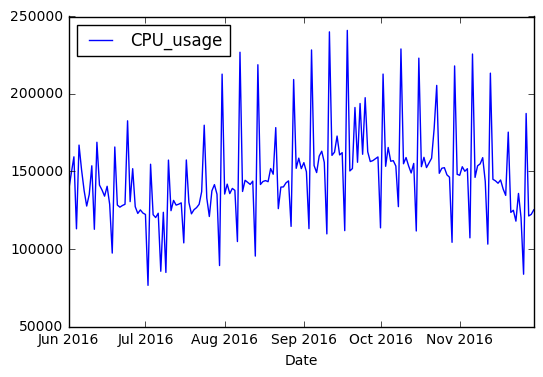

In [124]:
plt.figure()
new4.plot(x='Date', y='CPU_usage')
plt.show()

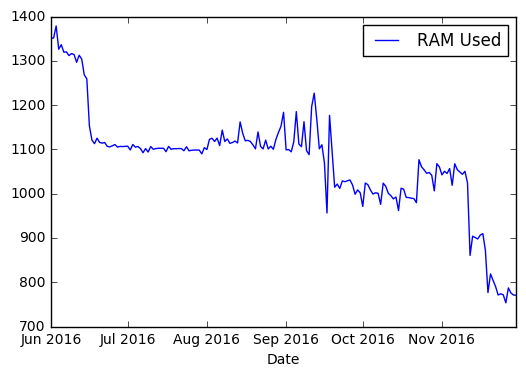

In [125]:
plt.figure()
new4.plot(x='Date', y='RAM Used')
plt.show()

In [87]:
temp2 = pd.DataFrame()

In [88]:
temp2['Date'] = new4['Date']

In [89]:
temp2.head()

Date
Esx_clust    Esx_host                                    
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops  2016-06-01
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-02
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-03
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-04
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-05

In [92]:
temp2['RAM_used'] = new4['RAM Used']

In [93]:
temp2['CPU'] = new4['CPU_usage']

In [94]:
temp2.head()

Date    RAM_used  \
Esx_clust    Esx_host                                                   
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops  2016-06-01  274.413794   
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-02  282.451661   
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-03  282.451661   
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-04  282.451661   
             ashacdvm01p:c4e-internal.c4e.ops  2016-06-05  282.451661   

                                                      CPU  
Esx_clust    Esx_host                                      
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops  26981.3632  
             ashacdvm01p:c4e-internal.c4e.ops  25936.3104  
             ashacdvm01p:c4e-internal.c4e.ops  32154.8064  
             ashacdvm01p:c4e-internal.c4e.ops  17860.9024  
             ashacdvm01p:c4e-internal.c4e.ops  36913.6832

In [99]:
ts=temp2['RAM_used']
ts.size

915

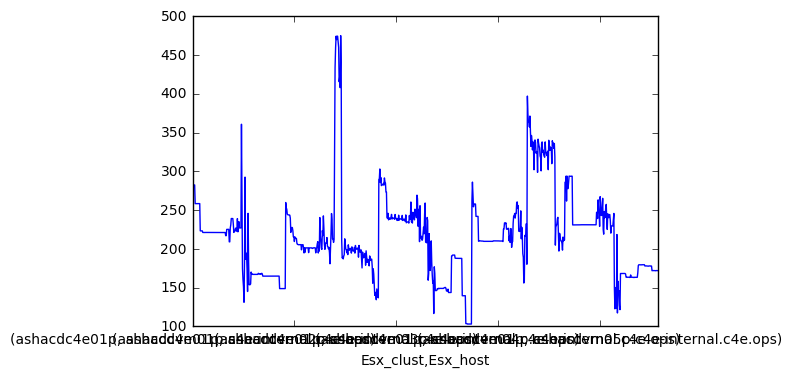

In [98]:
plt.figure()
ts.plot()
plt.show()

In [54]:
new2.head()

CPU_usage  \
Esx_clust    Esx_host                         Date                              
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops 2016-06-01 00:00:00  13240.2144   
                                              2016-06-01 01:00:00  13430.2240   
                                              2016-06-01 02:00:00  14069.3472   
                                              2016-06-01 03:00:00  11106.9248   
                                              2016-06-01 04:00:00   9655.9424   

                                                                     RAM Used  
Esx_clust    Esx_host                         Date                             
ashacdc4e01p ashacdvm01p:c4e-internal.c4e.ops 2016-06-01 00:00:00  274.413794  
                                              2016-06-01 01:00:00  274.413794  
                                              2016-06-01 02:00:00  274.413794  
                                              2016-06-01 03:00:00  274.413794  
                                              2016-06-01 04:00:00  274.413794

In [ ]:

        
        esx_jun2016_all['Date'] = pd.to_datetime(esx_jun2016_all['esx_time'])
        esx_jun2016_all['Date'] = esx_jun2016_all['Date'].dt.date
        esx_jun2016_GB_graph_tier = esx_jun2016_all.groupby(['Esx_clust', 'Esx_host', 'Date'])
        new_esx = esx_jun2016_GB_graph_tier.agg({'CPU_usage':'max', 'RAM Used':'max'})
        new_esx.reset_index(level=2, inplace=True)
        new_esx.reset_index(level=1, inplace=True)
        new_esx.drop(new_esx.columns[[0]], axis=1, inplace=True)
        

In [4]:
esx_acc_all.head()

,Esx_clust,Esx_host,esx_totmhz,esx_insram,esx_cpu,esx_ram,esx_loc,esx_time,CPU_usage,RAM Used
0,sydblfrc4e01p,sydblfrvm01p:c4e-internal.c4e.ops,86368.0,511.966034,21.07,47.68,als,9/10/2016 10:05:00 AM,18197.7376,244.105405
1,sydblfrc4e01p,sydblfrvm01p:c4e-internal.c4e.ops,86368.0,511.966034,19.48,47.68,als,9/10/2016 10:15:00 PM,16824.4864,244.105405
2,sydblfrc4e01p,sydblfrvm01p:c4e-internal.c4e.ops,86368.0,511.966034,18.43,47.68,als,9/10/2016 10:20:00 PM,15917.6224,244.105405
3,sydblfrc4e01p,sydblfrvm01p:c4e-internal.c4e.ops,86368.0,511.966034,19.05,47.68,als,9/10/2016 10:25:00 PM,16453.1040,244.105405
4,sydblfrc4e01p,sydblfrvm01p:c4e-internal.c4e.ops,86368.0,511.966034,18.98,47.68,als,9/10/2016 10:30:00 PM,16392.6464,244.105405


In [96]:
esx_acc_all.drop(esx_acc_all.columns[[2, 3, 4, 5, 6]], axis=1, inplace=True)
#esx_acc_all['esx_time'] = esx_acc_all['esx_time'].apply(lambda x: str(x).replace(str(x)[-8:-3],'00:00'))
esx_jun2016_all = esx_acc_all[esx_acc_all.esx_time.str.contains("6\/[0-9][0-9]\/2016") > 0]
esx_jun2016_all['Date'] = pd.to_datetime(esx_jun2016_all['esx_time'])
esx_jun2016_all['Date'] = esx_jun2016_all['Date'].dt.date
esx_jun2016_GB_graph_tier = esx_jun2016_all.groupby(['Esx_clust', 'Esx_host', 'Date'])        

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [97]:
esx_jun2016_all['Date'].head()

9676    2016-06-10
9677    2016-06-10
9678    2016-06-10
9679    2016-06-10
9680    2016-06-10
Name: Date, dtype: object

In [51]:
new_esx = esx_jun2016_GB_graph_tier.agg({'CPU_usage':'max', 'RAM Used':'max'})
new_esx.reset_index(level=2, inplace=True)
new_esx.reset_index(level=1, inplace=True)
new_esx.drop(new_esx.columns[[0]], axis=1, inplace=True)

In [52]:
esx_Graph = new_esx.groupby(['Date']).sum()
temp=esx_Graph.reset_index(level=['Date'])
temp2=pd.DataFrame()
temp2['Date']=temp['Date']
temp2['RAM_Used']=temp['RAM Used']
        

In [53]:
temp2 = temp2.set_index('Date')
ts=(temp2['RAM_Used'])        

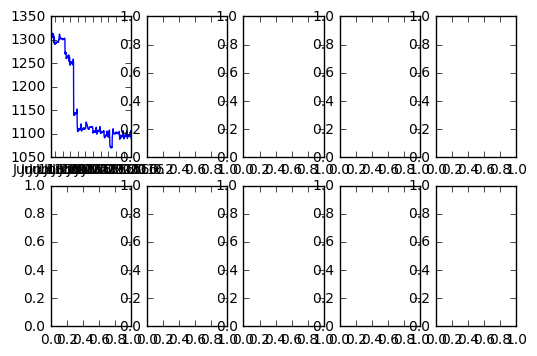

In [61]:
fig, ax = plt.subplots(2,5)
ax[0,0].plot(ts)
plt.show()

In [58]:
fig1, ax = plt.subplots(1,5)
m=0
n=0
ax[m,n].plot(ts)
# ax[m,n].set_title(location)
# ax[m,n].axes.get_xaxis().set_visible(False)
# ax[m,n].axes.get_yaxis().set_visible(False)
plt.show()

IndexError: too many indices for array

In [33]:
ts=(temp2['CPU_Usage'])
        bx[m,n].plot(ts)
        bx[m,n].set_title(location)
        bx[m,n].axes.get_xaxis().set_visible(False)
        bx[m,n].axes.get_yaxis().set_visible(False)

,Esx_clust,Esx_host,esx_time,CPU_usage,RAM Used,Date


In [32]:
esx_acc_all.head()

,Esx_clust,Esx_host,esx_time,CPU_usage,RAM Used
0,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,9/17/2016 10:00:00 PM,14233.4464,93.126622
1,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,9/17/2016 10:00:00 PM,14380.2720,93.126622
2,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,9/17/2016 10:00:00 PM,14380.2720,93.126622
3,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,9/17/2016 10:00:00 PM,14207.5360,93.126622
4,ashacdc4e01p,ashacdvm01p:c4e-internal.c4e.ops,9/17/2016 10:00:00 PM,14190.2624,93.126622


In [182]:
import datetime

In [183]:
x=datetime.datetime.now()

In [184]:
x

datetime.datetime(2017, 2, 18, 5, 11, 30, 595479)

In [188]:
y=datetime.datetime.now()-x

In [186]:
y

datetime.timedelta(0, 3, 415233)

In [189]:
print ("x"+str(y))

x0:00:28.925152
